# Descriptive evaluation 

In this notebook analysis which factors influance the inter annotator agreement tweets and the difference between demographic groups.



In [ ]:
# install advertools to easily identify emojis in dataset
!pip install advertools

In [ ]:
import pandas as pd
import matplotlib
import numpy as np

# plots
import plotly.express as px
import matplotlib.pyplot as plt

# library with statistics
from scipy import stats

# emojis
import advertools as adv


In [ ]:
# Colorcodes for the graphs
colors = ["#7dc491","#7dc4be","#7d91c4","#8b7dc4","#a57dc4", "#6d0f70"]

## Data

### IAA

In [ ]:
# Import data IAA
iaa_tweets = pd.read_excel("../Data/tweets.xlsx")

### Annotations

In [ ]:
# read excel file with every annotated tweet and the annotator id
df_annotations = pd.read_excel("../Data/annotations.xlsx")

### Annotator demographics

In [ ]:
# read excel file with every annotated tweet and the annotator id
df_annotators = pd.read_excel("../Data/annotators.xlsx")

In [ ]:
df_annotations = pd.merge(df_annotations, df_annotators, how='inner', on='Annotator_id')
df_annotations = pd.merge(df_annotations, iaa_tweets, how='inner', on=['Tweet_id', 'text_clean'])
df_annotations

,Sentiment,text_clean,Tweet_id,Annotator_id,Tweets_total,Tweets_correct,Acc,Gender,Flemish_Provinces,Age,Age_cat,Age_cat_two,Education,Education_cat,GR,iaa
0,neutral,ik heb 13u aan een stuk gewerkt come at me,1,67,300,252,0.840000,male,VLAAMS-BRABANT,30,30 to 39,above 23,doctorate,university,neutral,0.57927
1,neutral,ik heb 13u aan een stuk gewerkt come at me,1,82,1100,864,0.785455,female,OOST-VLAANDEREN,22,20 to 29,below 23,professional bachelor,no university,neutral,0.57927
2,neutral,ik heb 13u aan een stuk gewerkt come at me,1,18,300,199,0.663333,male,OOST-VLAANDEREN,55,50 to 59,above 23,high school,no university,neutral,0.57927
3,neutral,ik heb 13u aan een stuk gewerkt come at me,1,64,1500,1192,0.794667,male,VLAAMS-BRABANT,23,20 to 29,below 23,master,university,neutral,0.57927
4,negative,ik heb 13u aan een stuk gewerkt come at me,1,38,300,216,0.720000,female,OOST-VLAANDEREN,56,50 to 59,above 23,associate degree (HBO5),no university,neutral,0.57927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,neutral,Vandaag gepresenteerd door @BeMobileHQ: #CITRU...,2600,26,200,159,0.795000,male,VLAAMS-BRABANT,23,20 to 29,below 23,academic bachelor,university,neutral,1.00000
14996,neutral,Vandaag gepresenteerd door @BeMobileHQ: #CITRU...,2600,32,100,73,0.730000,male,WEST-VLAANDEREN,32,30 to 39,above 23,professional bachelor,no university,neutral,1.00000
14997,neutral,Vandaag gepresenteerd door @BeMobileHQ: #CITRU...,2600,5,100,71,0.710000,male,VLAAMS-BRABANT,24,20 to 29,above 23,master,university,neutral,1.00000
14998,neutral,Vandaag gepresenteerd door @BeMobileHQ: #CITRU...,2600,94,100,72,0.720000,female,WEST-VLAANDEREN,36,30 to 39,above 23,professional bachelor,no university,neutral,1.00000


## Tweets

### Is there more aggrement on positive/neutral/negative tweets?

In [ ]:
fig = px.histogram(iaa_tweets, nbins = 10, x='iaa', color='GR',title="IAA Distribution",histnorm='percent',  template="plotly_white",color_discrete_sequence=["orange", "green", "red", "black"])
fig.update_layout(font=dict(
        family="Helvetica",
        size=18
    ))
fig.update_layout(barmode='group', bargap=0.20,bargroupgap=0.0)
fig.show()

Is there an an significant differance between the iaa on positive/neutral/negative/unclear tweets?

IAA on positive/neutral/negative/unclear tweets?

The data is skewed (not normal distributed), so a non-parametric test is needed.

In [ ]:

stats.kruskal(iaa_tweets.query('GR=="positive"')['iaa'], iaa_tweets.query('GR=="neutral"')['iaa'], iaa_tweets.query('GR=="negative"')['iaa'], iaa_tweets.query('GR=="unclear"')['iaa'])

KruskalResult(statistic=59.682161092634836, pvalue=6.873023959731317e-13)

### Is there more aggrement when tweets contain emojis?

In [ ]:
text_list = iaa_tweets['text_clean']

# find all emojis in the tweets and convert to boolean (True if it contains emoji)
emoji_summary = adv.extract_emoji(text_list)
iaa_tweets['emoji_counts'] = emoji_summary['emoji_counts']
iaa_tweets['emoji'] = iaa_tweets['emoji_counts']>0

In [ ]:
fig = px.histogram(iaa_tweets, x='iaa', color='emoji' ,title="IAA Distribution", histnorm='probability density', color_discrete_sequence=colors, template="plotly_white")
fig.update_layout(font=dict(
        family="Helvetica",
        size=18
    ))
fig.update_layout(barmode='group', bargap=0.20,bargroupgap=0.0)
fig.show()

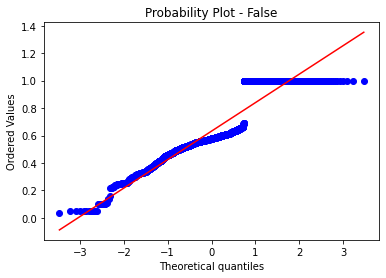

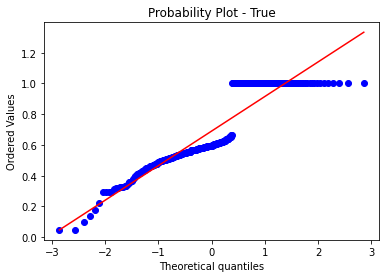

In [ ]:
# data not normal distributed -> non parametric test needed
unique_emoji = iaa_tweets['emoji'].unique()
for e in unique_emoji:
    stats.probplot(iaa_tweets[iaa_tweets['emoji'] == e]['iaa'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(e))
    plt.show()

####  Mann-Whitney U Test

Mann-Whitney is a non-parametric test for situations involving a categorical independent variable and an ordinal (rank) dependent variable. 

**0ne-sided test**

H0 iaa is equal if the tweet contains emojis or not
H1 iaa with emoji is greater than without



In [ ]:
# compare samples
stat, p = stats.mannwhitneyu(iaa_tweets.query('emoji==True')['iaa'], iaa_tweets.query('emoji==False')['iaa'], alternative='greater')
print('Statistics=%.3f, p=%.5f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=485583.500, p=0.00013
Different distribution (reject H0)


## Annotator groups



In [ ]:
# function to create the group aggrement
# group='Gender', group1 = 'M', group2= 'F', split='male'
def group_aggrement(group, group1, group2, split):
  df_tweet_group = iaa_tweets
  g1g1_list = []
  g1g2_list = []
  g2g2_list = []
  g1g1_agg_list = []
  g1g2_agg_list = []
  g2g2_agg_list = []

  for index_tweet, row_tweet in df_tweet_group.iterrows():
      tweet = df_annotations[df_annotations['Tweet_id']==row_tweet['Tweet_id']]
      
      g1g1 = 0
      g1g2 = 0
      g2g2 = 0

      g1g1_agg = 0
      g1g2_agg = 0
      g2g2_agg = 0

      # loop over annotations
      for index_ann_i, row_ann_i in tweet.iterrows():
          # loop over other annotations to compare
          for index_ann_j, row_ann_j in tweet.iterrows():
              # check if you compare different annotators
              if index_ann_i != index_ann_j:
                  # check if you compare same gender
                  if row_ann_i[group] == row_ann_j[group]:
                      if row_ann_i[group] == split: 
                          g1g1=g1g1+1
                          if row_ann_i['Sentiment'] == row_ann_j['Sentiment']:
                              g1g1_agg=g1g1_agg+1
                      else: 
                          g2g2=g2g2+1
                          if row_ann_i['Sentiment'] == row_ann_j['Sentiment']:
                              g2g2_agg=g2g2_agg+1
                  else: 
                      g1g2=g1g2+1
                      if row_ann_i['Sentiment'] == row_ann_j['Sentiment']:
                          g1g2_agg=g1g2_agg+1
      
      g1g1_list.append(g1g1)
      g1g2_list.append(g1g2)
      g2g2_list.append(g2g2)
      g1g1_agg_list.append(g1g1_agg)
      g1g2_agg_list.append(g1g2_agg)
      g2g2_agg_list.append(g2g2_agg)

  df_tweet_group[f'{group1}{group1}'] = g1g1_list
  df_tweet_group[f'{group1}{group2}'] = g1g2_list
  df_tweet_group[f'{group2}{group2}'] = g2g2_list
  df_tweet_group[f'{group1}{group1}_agg'] = g1g1_agg_list
  df_tweet_group[f'{group1}{group2}_agg'] = g1g2_agg_list
  df_tweet_group[f'{group2}{group2}_agg'] = g2g2_agg_list

  df_tweet_group[f'score_{group1}{group1}'] = df_tweet_group[f'{group1}{group1}_agg']/df_tweet_group[f'{group1}{group1}']
  df_tweet_group[f'score_{group1}{group2}'] = df_tweet_group[f'{group1}{group2}_agg']/df_tweet_group[f'{group1}{group2}']
  df_tweet_group[f'score_{group2}{group2}'] = df_tweet_group[f'{group2}{group2}_agg']/df_tweet_group[f'{group2}{group2}']
  return df_tweet_group

### Gender



#### Accuracy

In [ ]:
df_annotators.groupby(by="Gender")["Acc"].mean()

Gender
female    0.710657
male      0.710114
Name: Acc, dtype: float64

In [ ]:
df_annotators.groupby(by="Gender")["Acc"].std()

Gender
female    0.093312
male      0.108280
Name: Acc, dtype: float64

In [ ]:
stats.ttest_ind(df_annotators[df_annotators["Gender"] == "female"]["Acc"],df_annotators[df_annotators["Gender"] == "male"]["Acc"])

Ttest_indResult(statistic=0.02619479563312695, pvalue=0.9791580935531806)

In [ ]:
fig = px.histogram(df_annotators, x='Acc', color='Gender' ,title="Annotator accuracy", color_discrete_sequence=colors, template="plotly_white")
fig.update_layout(font=dict(
        family="Helvetica",
        size=18
    ))
fig.update_layout(barmode='group', bargap=0.20,bargroupgap=0.0)
fig.show()

#### IAA 

In [ ]:
df_annotations.groupby(by="Gender")["iaa"].mean()

Gender
female    0.631380
male      0.646593
Name: iaa, dtype: float64

In [ ]:
df_annotations.groupby(by="Gender")["iaa"].std()

Gender
female    0.223627
male      0.229706
Name: iaa, dtype: float64

#### Agreement

In [ ]:
df_tweet_gender = group_aggrement('Gender', 'm', 'f', 'male')

In [ ]:
df_tweet_gender

,Tweet_id,text_clean,GR,iaa,emoji_counts,emoji,mm,mf,ff,mm_agg,mf_agg,ff_agg,score_mm,score_mf,score_ff
0,1,ik heb 13u aan een stuk gewerkt come at me,neutral,0.579270,0,False,6,12,2,6,6,0,1.000000,0.500000,0.000000
1,2,Olive Garden - SNL,neutral,0.556808,0,False,6,12,2,2,8,2,0.333333,0.666667,1.000000
2,3,"Jozef De Kesel wordt zondag kardinaal: ""Ik kij...",positive,0.613758,0,False,6,12,2,2,8,2,0.333333,0.666667,1.000000
3,4,mijn wifi SUCKT echt en ik kant niemeer aan,negative,1.000000,0,False,6,12,2,6,12,2,1.000000,1.000000,1.000000
4,5,Gedraag je maar als een hoe,negative,0.464437,0,False,6,12,2,2,0,2,0.333333,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Kheb mij gisterenavond best wel goe gehad 😌,positive,1.000000,1,True,2,12,6,2,12,6,1.000000,1.000000,1.000000
2996,2997,Blij dat ze zich aan de charter houden! #homo...,positive,0.518596,0,False,2,12,6,2,8,2,1.000000,0.666667,0.333333
2997,2998,Ik mis mijn fiets,negative,0.575348,0,False,2,12,6,0,6,6,0.000000,0.500000,1.000000
2998,2999,Weer veel te laat naar bed. Dat ga ik morgenvr...,negative,1.000000,0,False,2,12,6,2,12,6,1.000000,1.000000,1.000000


In [ ]:
df_tweet_gender01 = df_tweet_gender.copy()

In [ ]:
# wide to long table
l_gender = pd.wide_to_long(df_tweet_gender[['Tweet_id','score_mm', 'score_mf', 'score_ff']], stubnames='score', sep='_', suffix=r'\w+', i=['Tweet_id'], j='gender_group')
l_gender.reset_index(inplace=True)
pd.crosstab(l_gender['gender_group'], l_gender['score']) 

score,0.000000,0.166667,0.250000,0.333333,0.500000,0.666667,0.750000,1.000000
gender_group,,,,,,,,
ff,445,117,0,712,252,0,0,1074
mf,241,98,172,428,696,352,280,733
mm,587,44,0,443,177,0,0,1149


In [ ]:
df_tweet_gender01['score_mm'].mask(df_tweet_gender01['score_mm']< 1 , 0, inplace=True)
df_tweet_gender01['score_mf'].mask(df_tweet_gender01['score_mf']< 1 , 0, inplace=True)
df_tweet_gender01['score_ff'].mask(df_tweet_gender01['score_ff']< 1 , 0, inplace=True)

In [ ]:
df_tweet_gender01

,Tweet_id,text_clean,GR,iaa,emoji_counts,emoji,mm,mf,ff,mm_agg,mf_agg,ff_agg,score_mm,score_mf,score_ff
0,1,ik heb 13u aan een stuk gewerkt come at me,neutral,0.579270,0,False,6,12,2,6,6,0,1.0,0.0,0.0
1,2,Olive Garden - SNL,neutral,0.556808,0,False,6,12,2,2,8,2,0.0,0.0,1.0
2,3,"Jozef De Kesel wordt zondag kardinaal: ""Ik kij...",positive,0.613758,0,False,6,12,2,2,8,2,0.0,0.0,1.0
3,4,mijn wifi SUCKT echt en ik kant niemeer aan,negative,1.000000,0,False,6,12,2,6,12,2,1.0,1.0,1.0
4,5,Gedraag je maar als een hoe,negative,0.464437,0,False,6,12,2,2,0,2,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Kheb mij gisterenavond best wel goe gehad 😌,positive,1.000000,1,True,2,12,6,2,12,6,1.0,1.0,1.0
2996,2997,Blij dat ze zich aan de charter houden! #homo...,positive,0.518596,0,False,2,12,6,2,8,2,1.0,0.0,0.0
2997,2998,Ik mis mijn fiets,negative,0.575348,0,False,2,12,6,0,6,6,0.0,0.0,1.0
2998,2999,Weer veel te laat naar bed. Dat ga ik morgenvr...,negative,1.000000,0,False,2,12,6,2,12,6,1.0,1.0,1.0


In [ ]:
# wide to long table
l_gender = pd.wide_to_long(df_tweet_gender01[['Tweet_id','score_mm', 'score_mf', 'score_ff']], stubnames='score', sep='_', suffix=r'\w+', i=['Tweet_id'], j='gender_group')
l_gender.reset_index(inplace=True)

In [ ]:
pd.crosstab(l_gender['gender_group'], l_gender['score']) 

score,0.0,1.0
gender_group,,
ff,1526,1074
mf,2267,733
mm,1251,1149


In [ ]:
pd.crosstab(l_gender['gender_group'], l_gender['score'], normalize='index') 

score,0.0,1.0
gender_group,,
ff,0.586923,0.413077
mf,0.755667,0.244333
mm,0.521250,0.478750


In [ ]:
l_gender = l_gender.dropna()

In [ ]:
prop_gender = l_gender.groupby('gender_group')["score"].agg(['mean', "size"])
prop_gender.columns = ['proportion_agreed','total_counts']
prop_gender.head()

,proportion_agreed,total_counts
gender_group,,
ff,0.413077,2600
mf,0.244333,3000
mm,0.478750,2400


In [ ]:
total_proportion_agreed_gender = (l_gender.score == 1).mean()

##### Proportion test agreement between males compared to agreement between females

In [ ]:
#Calculating standard error
 
variance = total_proportion_agreed_gender * (1 - total_proportion_agreed_gender)
standard_error = np.sqrt(variance * (1 / prop_gender.total_counts.ff + 1 / prop_gender.total_counts.mm))
print("Sample Standard Error",standard_error)

Sample Standard Error 0.013662886926512519


In [ ]:
# Calculate the test statistic 
best_estimate = (prop_gender.proportion_agreed.ff - prop_gender.proportion_agreed.mm)
print("The best estimate is",best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate-hypothesized_estimate) / standard_error
print("Computed Test Statistic is",test_stat)

The best estimate is -0.06567307692307695
Computed Test Statistic is -4.80667645690896


In [ ]:
# Calculate the  p-value
pvalue = 2*stats.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

Computed P-value is 1.5346003813825312e-06


### Education uni

#### Average accuracy

In [ ]:
df_annotators.groupby(by="Education_cat")["Acc"].mean()

Education_cat
no university    0.677509
university       0.746993
Name: Acc, dtype: float64

In [ ]:
df_annotators.groupby(by="Education_cat")["Acc"].std()

Education_cat
no university    0.104495
university       0.079926
Name: Acc, dtype: float64

In [ ]:
stats.ttest_ind(df_annotators[df_annotators["Education_cat"] == "no university"]["Acc"],df_annotators[df_annotators["Education_cat"] == "university"]["Acc"])

Ttest_indResult(statistic=-3.609735785098829, pvalue=0.0004961978338506334)

In [ ]:
fig = px.histogram(df_annotators, x='Acc', color='Education_cat' ,title="Annotator accuracy", color_discrete_sequence=colors, template="plotly_white")
fig.update_layout(font=dict(
        family="Helvetica",
        size=18
    ))
fig.update_layout(barmode='group', bargap=0.20,bargroupgap=0.0)
fig.show()

#### Average IAA 

In [ ]:
df_annotations.groupby(by="Education_cat").count()

,Sentiment,text_clean,Tweet_id,Annotator_id,Tweets_total,Tweets_correct,Acc,Gender,Flemish_Provinces,Age,Age_cat,Age_cat_two,Education,GR,iaa
Education_cat,,,,,,,,,,,,,,,
no university,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400
university,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600,7600


In [ ]:
df_annotations.groupby(by="Education_cat")["iaa"].mean()

Education_cat
no university    0.619072
university       0.657377
Name: iaa, dtype: float64

In [ ]:
df_annotations.groupby(by="Education_cat")["iaa"].std()

Education_cat
no university    0.224046
university       0.227496
Name: iaa, dtype: float64

#### Agreement

In [ ]:
fig = px.histogram(df_annotations, x='iaa', title="Education", color='Education_cat', color_discrete_sequence=colors, template="plotly_white")
fig.update_layout(font=dict(
        family="Helvetica",
        size=18
    ))
fig.update_layout(barmode='group', bargap=0.20,bargroupgap=0.0)
fig.show()

In [ ]:
df_tweet_edu = group_aggrement('Education_cat', 'n', 'u', 'no university')

In [ ]:
df_tweet_edu01 = df_tweet_edu.copy()

In [ ]:
# wide to long table
l_edu = pd.wide_to_long(df_tweet_edu[['Tweet_id','score_nn', 'score_nu', 'score_uu']], stubnames='score', sep='_', suffix=r'\w+', i=['Tweet_id'], j='edu_group')
l_edu.reset_index(inplace=True)
pd.crosstab(l_edu['edu_group'], l_edu['score']) 

score,0.000000,0.100000,0.166667,0.200000,0.250000,0.300000,0.333333,0.400000,0.500000,0.600000,0.666667,0.750000,1.000000
edu_group,,,,,,,,,,,,,
nn,492,1,117,20,0,22,458,74,192,53,0,0,871
nu,267,0,75,0,174,0,314,0,621,0,271,235,643
uu,330,4,72,20,0,23,470,33,156,60,0,0,1132


In [ ]:
df_tweet_edu01['score_nn'].mask(df_tweet_edu01['score_nn']< 1 , 0, inplace=True)
df_tweet_edu01['score_nu'].mask(df_tweet_edu01['score_nu']< 1 , 0, inplace=True)
df_tweet_edu01['score_uu'].mask(df_tweet_edu01['score_uu']< 1 , 0, inplace=True)

In [ ]:
# wide to long table
l_edu = pd.wide_to_long(df_tweet_edu[['Tweet_id','score_nn', 'score_nu', 'score_uu']], stubnames='score', sep='_', suffix=r'\w+', i=['Tweet_id'], j='edu_group')
l_edu.reset_index(inplace=True)
pd.crosstab(l_edu['edu_group'], l_edu['score']) 

score,0.000000,0.100000,0.166667,0.200000,0.250000,0.300000,0.333333,0.400000,0.500000,0.600000,0.666667,0.750000,1.000000
edu_group,,,,,,,,,,,,,
nn,492,1,117,20,0,22,458,74,192,53,0,0,871
nu,267,0,75,0,174,0,314,0,621,0,271,235,643
uu,330,4,72,20,0,23,470,33,156,60,0,0,1132


In [ ]:
# wide to long table
l_edu = pd.wide_to_long(df_tweet_edu01[['Tweet_id','score_nn', 'score_nu', 'score_uu']], stubnames='score', sep='_', suffix=r'\w+', i=['Tweet_id'], j='edu_group')
l_edu.reset_index(inplace=True)

In [ ]:
pd.crosstab(l_edu['edu_group'], l_edu['score']) 

score,0.0,1.0
edu_group,,
nn,1429,871
nu,1957,643
uu,1168,1132


In [ ]:
pd.crosstab(l_edu['edu_group'], l_edu['score'], normalize='index') 

score,0.0,1.0
edu_group,,
nn,0.621304,0.378696
nu,0.752692,0.247308
uu,0.507826,0.492174


In [ ]:
l_edu.isnull().sum()

Tweet_id        0
edu_group       0
score        1800
dtype: int64

In [ ]:
l_edu = l_edu.dropna()

In [ ]:
prop_edu = l_edu.groupby('edu_group')["score"].agg(['mean', "size"])
prop_edu.columns = ['proportion_agreed','total_counts']
prop_edu.head()

,proportion_agreed,total_counts
edu_group,,
nn,0.378696,2300
nu,0.247308,2600
uu,0.492174,2300


In [ ]:
total_proportion_agreed_edu = (l_edu.score == 1).mean()

##### Proportion test agreement between annotatators without a university degree compared to agreement between annotators with a university degree

In [ ]:
#Calculating standard error
 
variance = total_proportion_agreed_edu * (1 - total_proportion_agreed_edu)
standard_error = np.sqrt(variance * (1 / prop_edu.total_counts.nn + 1 / prop_edu.total_counts.uu))
print("Sample Standard Error",standard_error)

Sample Standard Error 0.014217067208112933


In [ ]:
# Calculate the test statistic 
best_estimate = (prop_edu.proportion_agreed.nn - prop_edu.proportion_agreed.uu)
print("The best estimate is",best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate-hypothesized_estimate) / standard_error
print("Computed Test Statistic is",test_stat)

The best estimate is -0.1134782608695652
Computed Test Statistic is -7.981833328100827


In [ ]:
# Calculate the  p-value
pvalue = 2*stats.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

Computed P-value is 1.4417562644558123e-15


### Age

#### Average accuracy

In [ ]:
fig = px.histogram(df_annotators, x='Acc' , color='Age_cat_two', title="Annotators/age", color_discrete_sequence=colors, template="plotly_white")
fig.update_layout(font=dict(
        family="Helvetica",
        size=18
    ))
fig.update_layout(barmode='group', bargap=0.20,bargroupgap=0.0)
fig.show()

In [ ]:
df_annotators.groupby(by="Age_cat_two")["Acc"].mean()

Age_cat_two
above 23    0.702830
below 23    0.720003
Name: Acc, dtype: float64

In [ ]:
df_annotators.groupby(by="Age_cat_two")["Acc"].std()

Age_cat_two
above 23    0.096505
below 23    0.103507
Name: Acc, dtype: float64

In [ ]:
stats.ttest_ind(df_annotators[df_annotators["Age_cat_two"] == "23 and below"]["Acc"],df_annotators[df_annotators["Age_cat_two"] == "above 23"]["Acc"], equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

#### Average IAA

In [ ]:
df_annotations.groupby(by="Age_cat_two")["iaa"].mean()

Age_cat_two
above 23    0.629497
below 23    0.645929
Name: iaa, dtype: float64

In [ ]:
df_annotations.groupby(by="Age_cat_two")["iaa"].std()

Age_cat_two
above 23    0.221975
below 23    0.230119
Name: iaa, dtype: float64

#### Agreement

In [ ]:
df_tweet_age = group_aggrement('Age_cat_two', 'b', 'a', 'below 23')

In [ ]:
df_tweet_age01 = df_tweet_age.copy()

In [ ]:
# wide to long table
l_age = pd.wide_to_long(df_tweet_age[['Tweet_id','score_bb', 'score_ba', 'score_aa']], stubnames='score', sep='_', suffix=r'\w+', i=['Tweet_id'], j='age_group')
l_age.reset_index(inplace=True)

In [ ]:
pd.crosstab(l_age['age_group'], l_age['score']) 


score,0.000000,0.100000,0.166667,0.200000,0.250000,0.300000,0.333333,0.400000,0.500000,0.600000,0.666667,0.750000,1.000000
age_group,,,,,,,,,,,,,
aa,401,0,106,0,0,0,576,0,183,0,0,0,834
ba,261,0,92,0,206,0,347,0,653,0,263,290,688
bb,460,4,83,19,0,30,397,43,269,59,0,0,1136


In [ ]:
df_tweet_age01['score_bb'].mask(df_tweet_age01['score_bb']< 1 , 0, inplace=True)
df_tweet_age01['score_ba'].mask(df_tweet_age01['score_ba']< 1 , 0, inplace=True)
df_tweet_age01['score_aa'].mask(df_tweet_age01['score_aa']< 1 , 0, inplace=True)

In [ ]:
# wide to long table
l_age = pd.wide_to_long(df_tweet_age01[['Tweet_id','score_bb', 'score_ba', 'score_aa']], stubnames='score', sep='_', suffix=r'\w+', i=['Tweet_id'], j='age_group')
l_age.reset_index(inplace=True)

In [ ]:
pd.crosstab(l_age['age_group'], l_age['score']) 

score,0.0,1.0
age_group,,
aa,1266,834
ba,2112,688
bb,1364,1136


In [ ]:
pd.crosstab(l_age['age_group'], l_age['score'], normalize='index') 

score,0.0,1.0
age_group,,
aa,0.602857,0.397143
ba,0.754286,0.245714
bb,0.545600,0.454400


In [ ]:
l_age.isnull().sum()

Tweet_id        0
age_group       0
score        1600
dtype: int64

In [ ]:
l_age = l_age.dropna()

In [ ]:
prop_age = l_age.groupby('age_group')["score"].agg(['mean', "size"])
prop_age.columns = ['proportion_agreed','total_counts']
prop_age.head()

,proportion_agreed,total_counts
age_group,,
aa,0.397143,2100
ba,0.245714,2800
bb,0.454400,2500


In [ ]:
total_proportion_agreed_age = (l_age.score == 1).mean()

##### Proportion test agreement between annotators of 23 or younger compared to agreement between annotators older then 23

In [ ]:
#Calculating standard error
 
variance = total_proportion_agreed_age * (1 - total_proportion_agreed_age)
standard_error = np.sqrt(variance * (1 / prop_age.total_counts.bb + 1 / prop_age.total_counts.aa))
print("Sample Standard Error",standard_error)

Sample Standard Error 0.014201224974463692


In [ ]:
# Calculate the test statistic 
best_estimate = (prop_age.proportion_agreed.bb - prop_age.proportion_agreed.aa)
print("The best estimate is",best_estimate)
hypothesized_estimate = 0
test_stat = (best_estimate-hypothesized_estimate) / standard_error
print("Computed Test Statistic is",test_stat)

The best estimate is 0.057257142857142895
Computed Test Statistic is 4.031845348559814


In [ ]:
# Calculate the  p-value
pvalue = 2*stats.norm.cdf(-np.abs(test_stat)) # Multiplied by two indicates a two tailed testing.
print("Computed P-value is", pvalue)

Computed P-value is 5.534060058064349e-05
